In [5]:
# imports -- just run this cell
import scipy
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Closure and Voice-Onset Time

In this notebook, we will be exploring the relations between the data the class submit, your data, and the data of a past class. 

## 1. Explore your own data
We will start by familiarizing ourselves with the data.

To visualize the data, we need to load the file first. Set "Fall2017_file" to the name of your data file by replacing the ellipsis (the 3 dots), to the location of the csv file. Then, run the code by pressing "Shift" + "Enter".

In [6]:
fall2017_file = 'data/vots.csv' #CHANGE TO ELLIPSIS IN ORIGINAL NOTEBOOK 
fa17 = pd.read_csv(fall2017_file)
fa17['Class'] = ['fall 2017'] * len (fa17)
fa17.head()

,language,gender,height,closure,vot,pclo,tclo,kclo,pvot,tvot,kvot,Class
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,fall 2017
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,fall 2017
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,fall 2017
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,fall 2017
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,fall 2017


### 1.1 Data Visualization
Now that we have our information loaded, let's get a picture of the data with some plots.

#### COUNT: 
Below, we will see the number of each gender among the data we have.

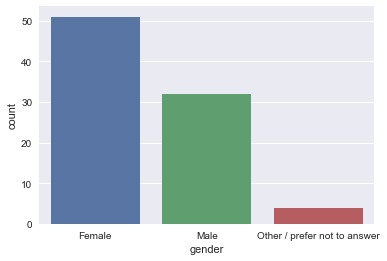

In [40]:
ax = sns.countplot(x="gender", data=fa17)

Below, we will see the number of people who speak each language.

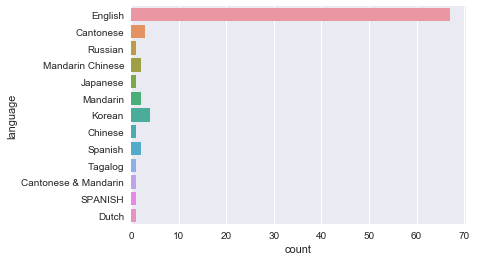

In [8]:
sns.countplot(y="language", data=fa17)

Below, we have a the distribution of height.

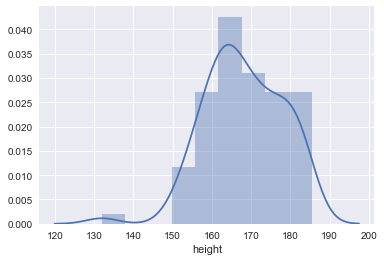

In [9]:
sns.distplot(fa17['height'])

### 1.2 Computing Basic Properties
We will compute the mean, median, mode, and range for closure.

In [10]:
fa17_closure_mode = scipy.stats.mode(fa17.closure)[0][0]
print('Mode: ', fa17_closure_mode)

fa17.closure.describe()

Mode:  0.07


count    87.000000
mean      0.084279
std       0.037605
min       0.007360
25%       0.059391
50%       0.078172
75%       0.106342
max       0.201000
Name: closure, dtype: float64

# 2. Explore relationships to metadata
Now let's explore relationships between closure and different characteristics of the persons who delivered those stats, specifically at language, gender, and height. We'll draw scatter plots to see whether there are linear relationships between them.

### 2.1 Language
Here, each dot is a person and you can see what language they speak and their respective closure measurement.

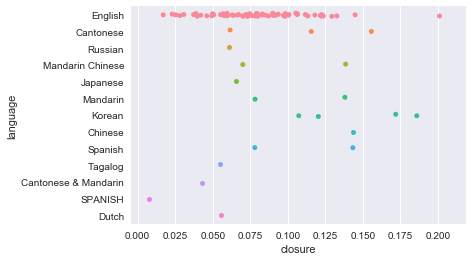

In [11]:
sns.stripplot(x="closure", y="language", data=fa17, jitter=True);

We can see that the majority speak English.
Question: if we try to come up with conclusion about people who speak Tagalog/Dutch, would the conclusions be reliable and why? (Type your answer below)

**Answer**:

Below, we take the graph above and visualize the mean of the closures of people who speak each language.

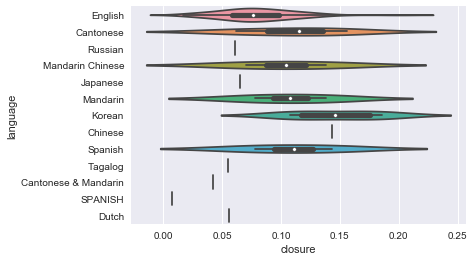

In [12]:
sns.violinplot(x="closure", y="language", data=fa17);

Compare the means. What do they tell you?

**Answer**:

### 2.2 Gender

In this section, we will dig into the relationship between closure and gender.

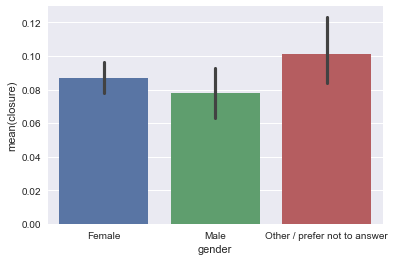

In [13]:
ax = sns.barplot(x="gender", y="closure", data=fa17)

What's the graph above showing? Can you analyze it? Type your answer below.

**Answer**:

Below, each dot is defined by gender on the y-axis and closure on the x-axis.

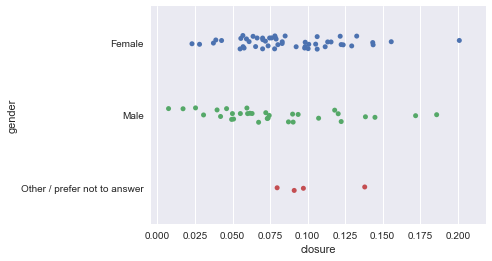

In [14]:
sns.stripplot(x="closure", y="gender", data=fa17, jitter=True);

How does men's average closure compare with women's? Does your conclusion fron this scatter plot agree with the bar chart we presented before? Type your answer below.

**Answer**:

### 2.3 Height

Now we'll look at how height influences closure.

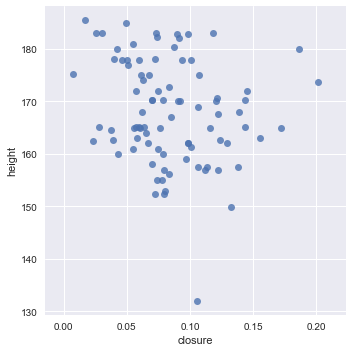

In [15]:
sns.lmplot('closure', 'height', data=fa17, fit_reg=False)

In the scatter plot above, each dot is defined by closure and height. Change "fit_reg" to "True" in the code above to see the regression line.

What does this graph tell about the relationship between height and closure? Type your answer below.

**Answer**:

### Visualizing Multiple Features

So far, we've been presenting two kinds of information in one plot (eg. language vs. closure). Would presenting more than two at once help us at analyzing? Let's try it.

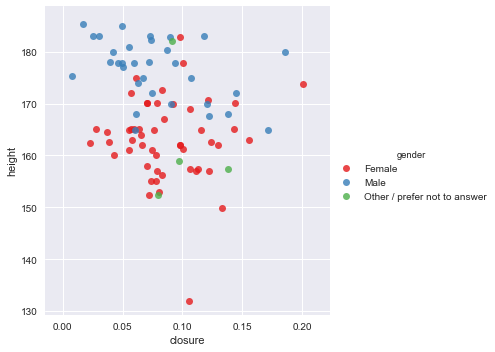

In [16]:
sns.lmplot(fit_reg=False, x="closure", y="height", hue="gender", palette="Set1", data=fa17)

Describe in your own words what each dot in the scatter plot above represents. Do you see some general patterns here? Type your answer below.

**Answer**:

Now, change the code `fit_reg=False` to fit_`reg=True` to see the regression line.


Regression lines generally describe a general trend of the data. What conclusions can you make by comparing the two regression lines? Type your answer below.

**Answer**:

Below, the color of the dots will depend on the language that person speaks rather than its gender.

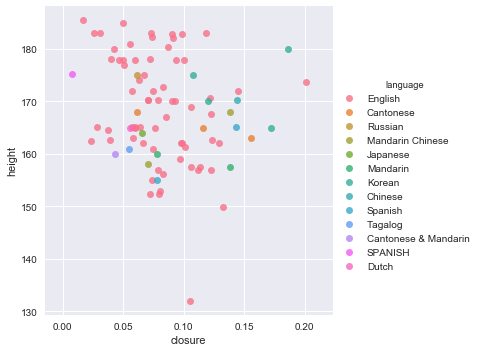

In [17]:
sns.lmplot('closure', 'height', data=fa17, fit_reg=False, hue="language")

What conclusions can you make from the graph above? Is it easier to analyze this plot than the plot before? Why? Type your answer below.

**Answer**:

# 3. Compare data of entire class

### 3.1 Compare individual CLOSURE with the rest of class

Let's see where your own data stands in relation with the rest of the class. Change "myRowNumber" to the number of the row in the table that contains your data and run the cell.

In [88]:
myRowNumber = 7 #CHANGE TO ELLIPSIS IN ORIGINAL NOTEBOOK

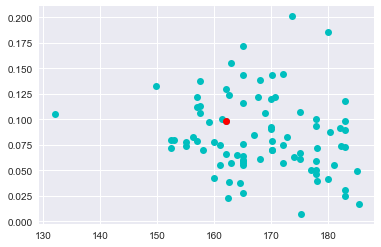

In [89]:
xAxis = fa17['height'].tolist()
yAxis = fa17['closure'].tolist()

myHeight = xAxis.pop(myRowNumber)
myClosure = yAxis.pop(myRowNumber)

plt.plot(xAxis, yAxis, 'co')
plt.plot(myHeight, myClosure, "ro")

plt.show()

### 3.2 Compare our data with data from last semester

It's often useful to compare current data with past data. Below, we'll explore class data collected from last semester.

In [20]:
spring2017_file = 'data/vots.csv'
sp17 = pd.read_csv(spring2017_file)
sp17['Class'] = ['spring 2017'] * len (sp17)

sp17fa17 = sp17.append(fa17)
sp17fa17.head()

,language,gender,height,closure,vot,pclo,tclo,kclo,pvot,tvot,kvot,Class
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,spring 2017
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,spring 2017
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,spring 2017
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,spring 2017
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,spring 2017


As before, we'll calculate the mean, mode, median, and range of last semester's closure and compare to ours.

In [21]:
fa17_closure_mean = np.mean(fa17.closure)
fa17_closure_mode = scipy.stats.mode(fa17.closure)[0][0]
fa17_closure_median = np.median(fa17.closure)
fa17_closure_range = [min(fa17.closure), max(fa17.closure)]

sp17_closure_mean = np.mean(sp17.closure)
sp17_closure_mode = scipy.stats.mode(sp17.closure)[0][0]
sp17_closure_median = np.median(sp17.closure)
sp17_closure_range = [min(sp17.closure), max(sp17.closure)]

df = pd.DataFrame()
df['Closure'] = ['mean', 'mode', 'median', 'range']
df['Spring 2017'] = [sp17_closure_mean, sp17_closure_mode, sp17_closure_median, sp17_closure_range]
df['Fall 2017'] = [fa17_closure_mean, fa17_closure_mode, fa17_closure_median, fa17_closure_range]
df

,Closure,Spring 2017,Fall 2017
0,mean,0.0842792,0.0842792
1,mode,0.07,0.07
2,median,0.0781723,0.0781723
3,range,"[0.007359567, 0.201]","[0.007359567, 0.201]"


Let's check the closure mean by **gender** of last semester's class and compare to our class.

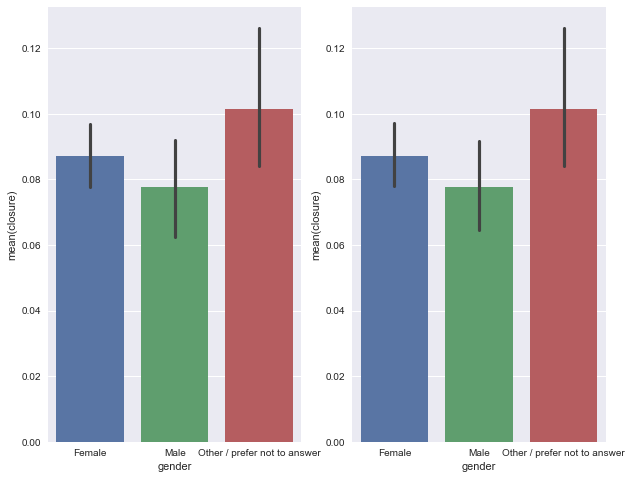

In [22]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 8)
sns.barplot(x="gender", y="closure", data=sp17, ax=ax[0])
sns.barplot(x="gender", y="closure", data=fa17, ax=ax[1])

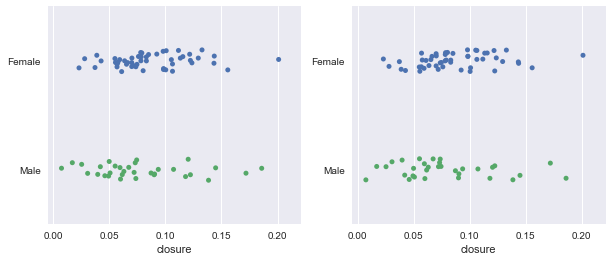

In [23]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 4)
sns.stripplot(x="closure", y="gender", data=sp17[sp17['gender'] != "Other / prefer not to answer"], jitter=True, ax=ax[0]).set_ylabel('')
sns.stripplot(x="closure", y="gender", data=fa17[sp17['gender'] != "Other / prefer not to answer"], jitter=True, ax=ax[1]).set_ylabel('')

Now let's look at their language and closure and compare to ours.

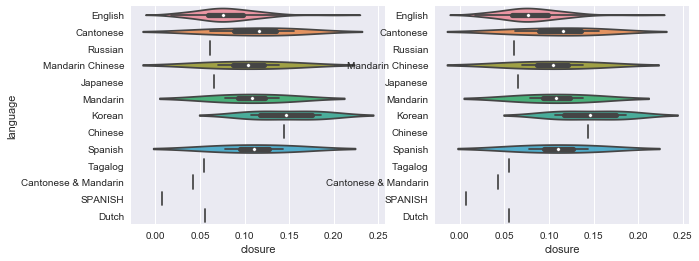

In [24]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 4)
sns.violinplot(x="closure", y="language", data=fa17, ax=ax[0])
sns.violinplot(x="closure", y="language", data=sp17, ax=ax[1]).set_ylabel('')

Very interesting. How about the **height**?

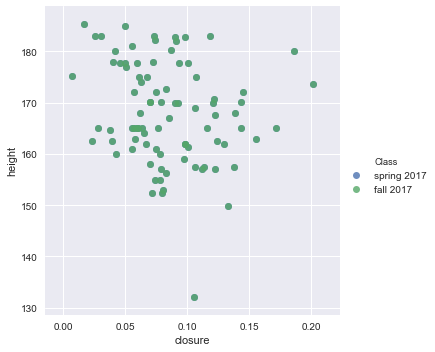

In [90]:
ax = sns.lmplot('closure', 'height', data=sp17fa17, fit_reg=False, hue='Class')

Lastly, let's look at the relationship between **height, gender, and closure** and compare.

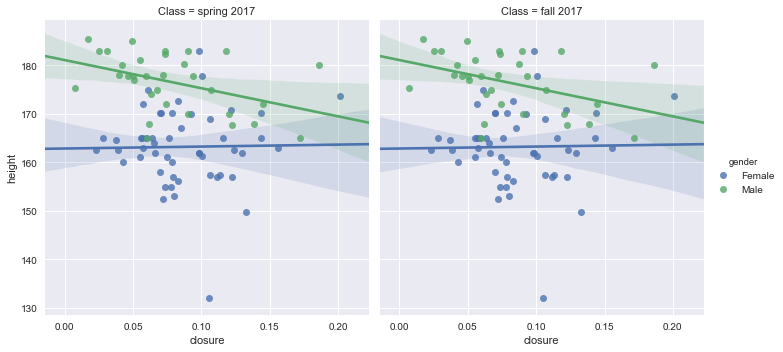

In [91]:
ax = sns.lmplot(x="closure", y="height",hue='gender', col="Class", data=sp17fa17[sp17fa17['gender'] != 'Other / prefer not to answer'])

Overall, how does our class data comprare with last semester's? Type your answer below.

**Answer**:

# 4. Place of Articulation

## 4.1 Closure

Let's see if we can find relationships between closure and places of articulation

First, we'll look at the **histogram** of closure, pclo, tclo, and kclo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d3e4b00>]], dtype=object)

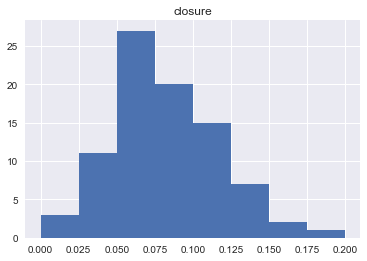

In [50]:
fa17.hist('closure', bins=np.arange(0, .225, .025))

Let's first visualize the places of articulation below.

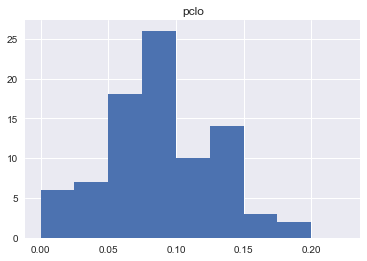

In [53]:
ax = fa17.hist('pclo', bins=np.arange(0, .25, .025))

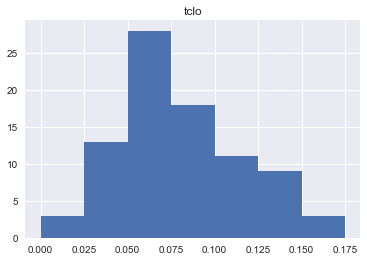

In [55]:
ax = fa17.hist('tclo', bins=np.arange(0, .2, .025))

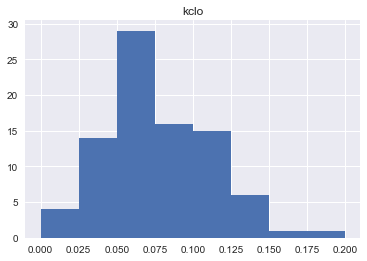

In [56]:
ax = fa17.hist('kclo', bins=np.arange(0, .225, .025))

Now we have an idea of the distributions of the data we are exploring. Let's plot and compare each of the places of articulation.

**tclo and pclo:**

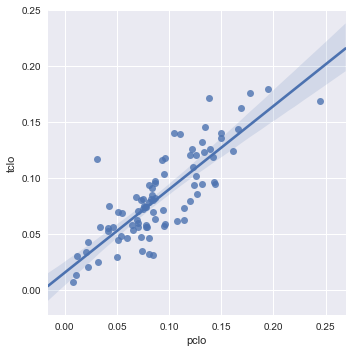

In [29]:
sns.lmplot('pclo', 'tclo', data=fa17)

**kclo and pclo:**

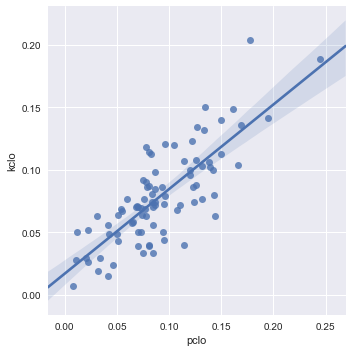

In [30]:
sns.lmplot('pclo', 'kclo', data=fa17)

**kclo and tclo:**

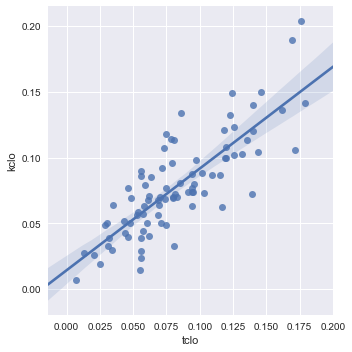

In [31]:
sns.lmplot('tclo', 'kclo', data=fa17)

Do you see any interesting relationships? Type your observation below.

**Answer**:

Here's one plot that that has all pclo, tclo, and kclo plotted against height.

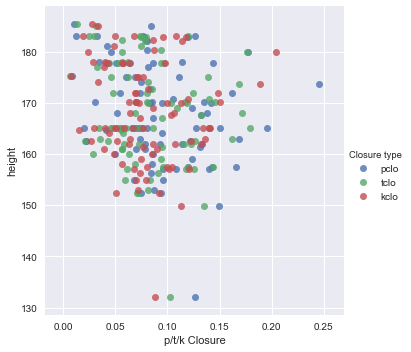

In [32]:
height_3x = fa17.height.append(fa17.height).append(fa17.height)
ptk_closure = fa17.pclo.append(fa17.tclo).append(fa17.kclo)
closure_type = ['pclo'] * 87 + ['tclo'] * 87 + ['kclo'] * 87

c = {'height': height_3x, 'p/t/k Closure': ptk_closure, 'Closure type' : closure_type}
closure = pd.DataFrame(data=c)
#closure.head()

ax = sns.lmplot('p/t/k Closure', 'height', data=closure, fit_reg=False, hue="Closure type")

## 4.2 VOT

Let's first check out the numerical distribution of VOT.

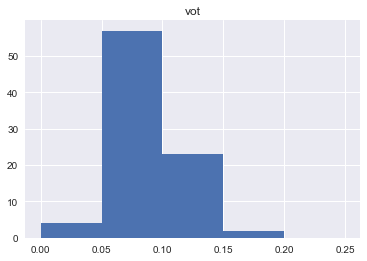

In [59]:
ax = fa17.hist('vot', bins=np.arange(0, .3, .05))

Let's plot out the distributions of each articulation as well.

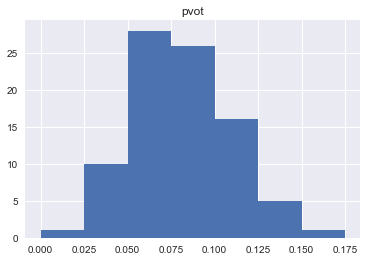

In [66]:
ax = fa17.hist('pvot', bins=np.arange(0, .2, .025))

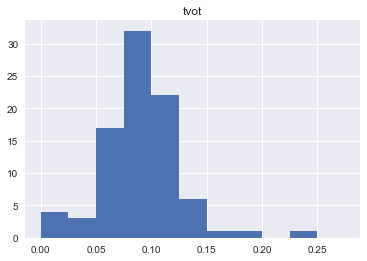

In [72]:
ax = fa17.hist('tvot', bins=np.arange(0, .3, .025))

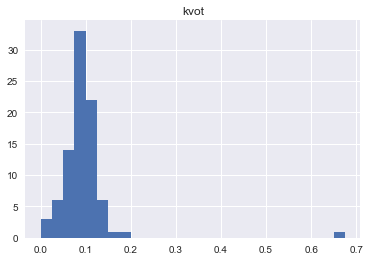

In [71]:
ax = fa17.hist('kvot', bins=np.arange(0, .7, .025))

Now we have an idea of the distributions of the data we are exploring. Let's plot and compare each of the places of articulation.

**tvot and pvot:**

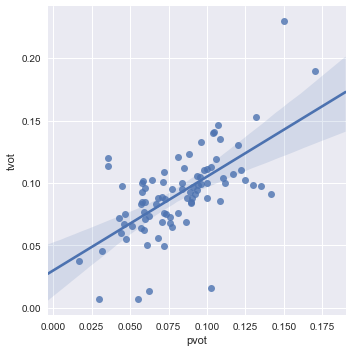

In [73]:
sns.lmplot('pvot', 'tvot', data=fa17)

**kvot and pvot:**

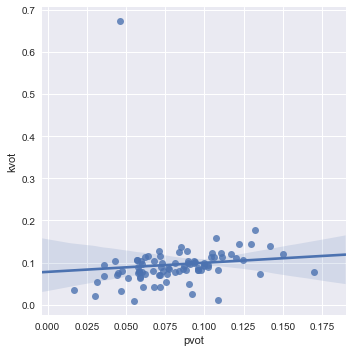

In [74]:
sns.lmplot('pvot', 'kvot', data=fa17)

**kvot and tvot:**

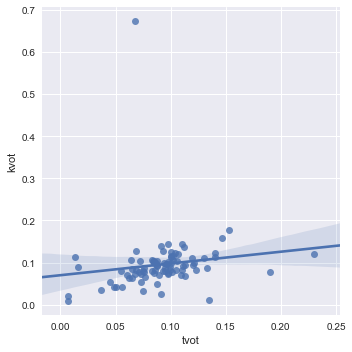

In [75]:
sns.lmplot('tvot', 'kvot', data=fa17)

Do you see any interesting relationships? Type your observation below.

**Answer**:

(Optional) If you're interested, here's a scatter plot of height against each of the place of articulation.

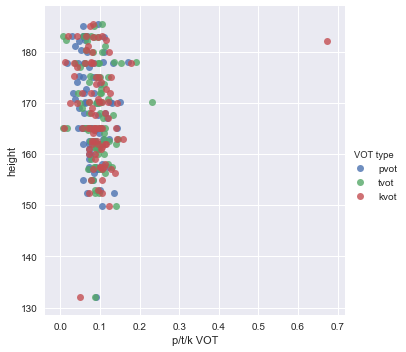

In [76]:
ptk_vot = fa17.pvot.append(fa17.tvot).append(fa17.kvot)
vot_type = ['pvot'] * 87 + ['tvot'] * 87 + ['kvot'] * 87

v = {'height': height_3x, 'p/t/k VOT': ptk_vot, 'VOT type' : vot_type}
vot = pd.DataFrame(data=v)

ax = sns.lmplot('p/t/k VOT', 'height', data=vot, fit_reg=False, hue="VOT type")

# 5. Voiced stops (bvot, dvot, gvot)

In [77]:
# SIMULATING VOICED (bdg) VALUES FROM VOICELESS (ptk)
# SHOULD NOT BE PART OF THE NOTEBOOK
fa17['bvot'] = fa17.pvot + 0.05
fa17['dvot'] = fa17.tvot + 0.05
fa17['gvot'] = fa17.kvot + 0.05

We will begin by adding a column for average voiced and average voiceless for each person in our table:

In [78]:
fa17.rename(columns={'vot':'vot (ptk)'}, inplace=True)
fa17['vot (bdg)'] = fa17[['bvot', 'dvot', 'gvot']].mean(numeric_only=True, axis=1)
fa17.head()

,language,gender,height,closure,vot (ptk),pclo,tclo,kclo,pvot,tvot,kvot,Class,bvot,dvot,gvot,vot (bdg)
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621,fall 2017,0.136985,0.137877,0.141621,0.138828
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000,fall 2017,0.122000,0.099000,0.093000,0.104667
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000,fall 2017,0.200000,0.280000,0.170000,0.216667
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000,fall 2017,0.220000,0.240000,0.127000,0.195667
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000,fall 2017,0.182000,0.203000,0.227000,0.204000


Now, we will compare our data. First, let's look at the relationship between the average of the voiced (bdg) and the voiceless (ptk) place of articulation:

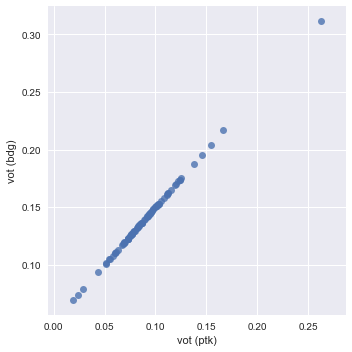

In [79]:
sns.lmplot('vot (ptk)', 'vot (bdg)', data=fa17, fit_reg=False)

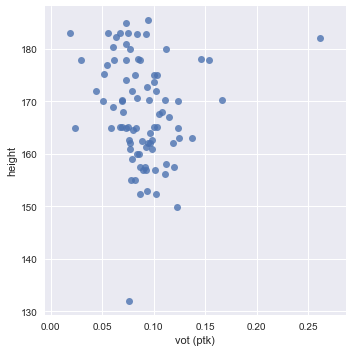

In [80]:
sns.lmplot('vot (ptk)', 'height', data=fa17, fit_reg=False)

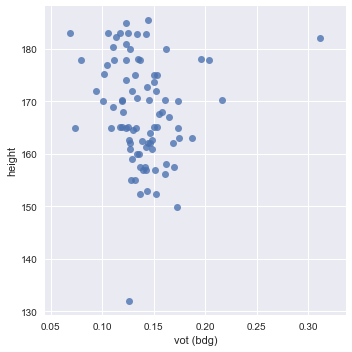

In [81]:
sns.lmplot('vot (bdg)', 'height', data=fa17, fit_reg=False)

What are some interesting relationships do you observe? Type your answer below:

**Answer**: 

# 6. Overall Observation

Share three interesting relationship you observed (ie. the relationship between closure and height, etc.). Explain the significance of each.

**First observation**:

**Second observation**:

**Third observation**: